# Sentiment and Emotion Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jbl
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
df = jbl.load('preprocessed_df.pkl')
category_cols = df.columns[3:-1]
print(category_cols)

df['clean_text'] = df["clean_text"].apply(lambda x: " ".join(x))
df['clean_text'].head()

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'water', 'food', 'shelter', 'clothing', 'money', 'missing_people',
       'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'],
      dtype='object')


0       weather update cold front cuba could pas haiti
1                                            hurricane
2                                 looking someone name
3    un report leogane destroyed hospital st croix ...
4       say west side haiti rest country today tonight
Name: clean_text, dtype: object

## Scoring

In [2]:
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['clean_text'].apply(lambda text: sia.polarity_scores(text)['compound'])
df['vader_label'] = df['vader_compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))
df['tb_polarity'] = df['clean_text'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['tb_label'] = df['tb_polarity'].apply(lambda p: 'positive' if p > 0 else ('negative' if p < 0 else 'neutral'))

## Sentiment distributions (VADER vs TextBlob)

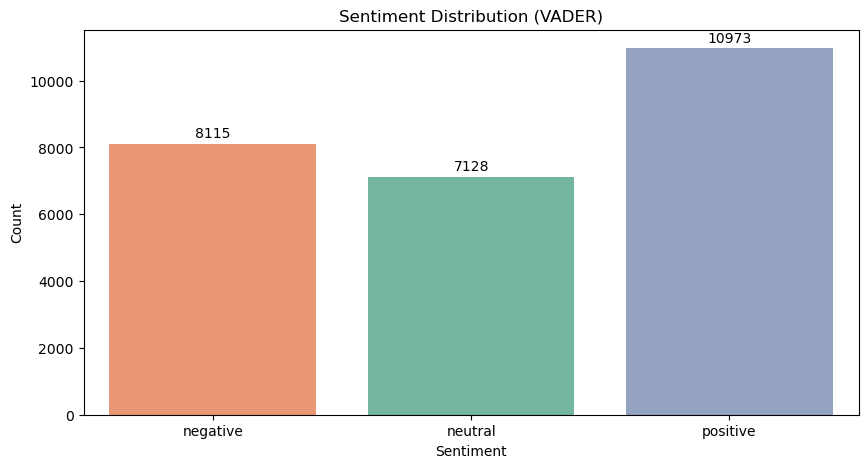

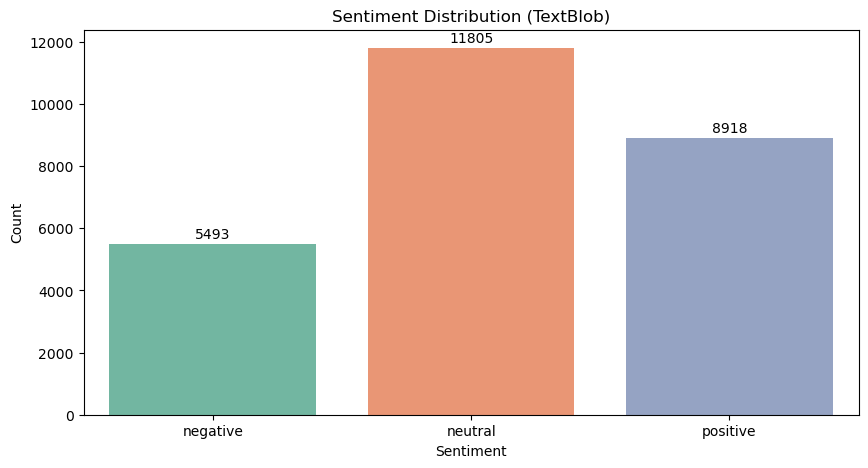

In [3]:
order = ['negative','neutral','positive']
plt.figure(figsize=(10,5))
axes = plt.axes()
sns.countplot(data=df, x='vader_label', order=order, hue ='vader_label', ax=axes,  palette="Set2")
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment') 
plt.ylabel('Count')
for container in axes.containers:
    plt.bar_label(container, label_type='edge', padding=2)
plt.show()

plt.figure(figsize=(10,5))
axes = plt.axes()
sns.countplot(data=df, x='tb_label', order=order,  hue = 'tb_label', ax=axes,  palette="Set2")
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment'); 
plt.ylabel('Count')
for container in axes.containers:
    plt.bar_label(container, label_type='edge', padding=2)
plt.show()

## Final results

In [4]:

melted = df.melt(id_vars=['vader_compound', 'tb_polarity', 'vader_label', "tb_label"], value_vars=category_cols, var_name='category',value_name='label')
melted = melted[melted['label'] == 1]

summary = (melted.groupby('category').agg(
        avg_vader=('vader_compound', 'mean'),
        avg_tb=('tb_polarity', 'mean'),
        pos_vader=('vader_label', lambda x: (x == 'positive').sum()),
        neu_vader=('vader_label', lambda x: (x == 'neutral').sum()),
        neg_vader=('vader_label', lambda x: (x == 'negative').sum()),
        pos_tb=('tb_label', lambda x: (x == 'positive').sum()),
        neu_tb=('tb_label', lambda x: (x == 'neutral').sum()),
        neg_tb=('tb_label', lambda x: (x == 'negative').sum())
    ).reset_index()
)

display(summary)

,category,avg_vader,avg_tb,pos_vader,neu_vader,neg_vader,pos_tb,neu_tb,neg_tb
0,aid_centers,-0.008976,0.014629,125,65,119,112,111,86
1,aid_related,0.000285,0.026269,4451,2269,4140,3619,4550,2691
2,buildings,-0.257420,0.005761,311,173,849,447,461,425
3,clothing,0.144266,0.058538,196,122,87,160,163,82
4,cold,-0.155314,-0.059949,154,103,273,152,125,253
5,death,-0.475926,-0.033182,164,80,950,356,297,541
6,direct_report,0.118921,0.042260,2484,1190,1401,1643,2484,948
7,earthquake,-0.042212,0.014667,848,675,932,748,1133,574
8,electricity,-0.108466,0.020754,169,98,265,197,175,160
9,fire,-0.247998,0.034352,71,33,178,110,87,85


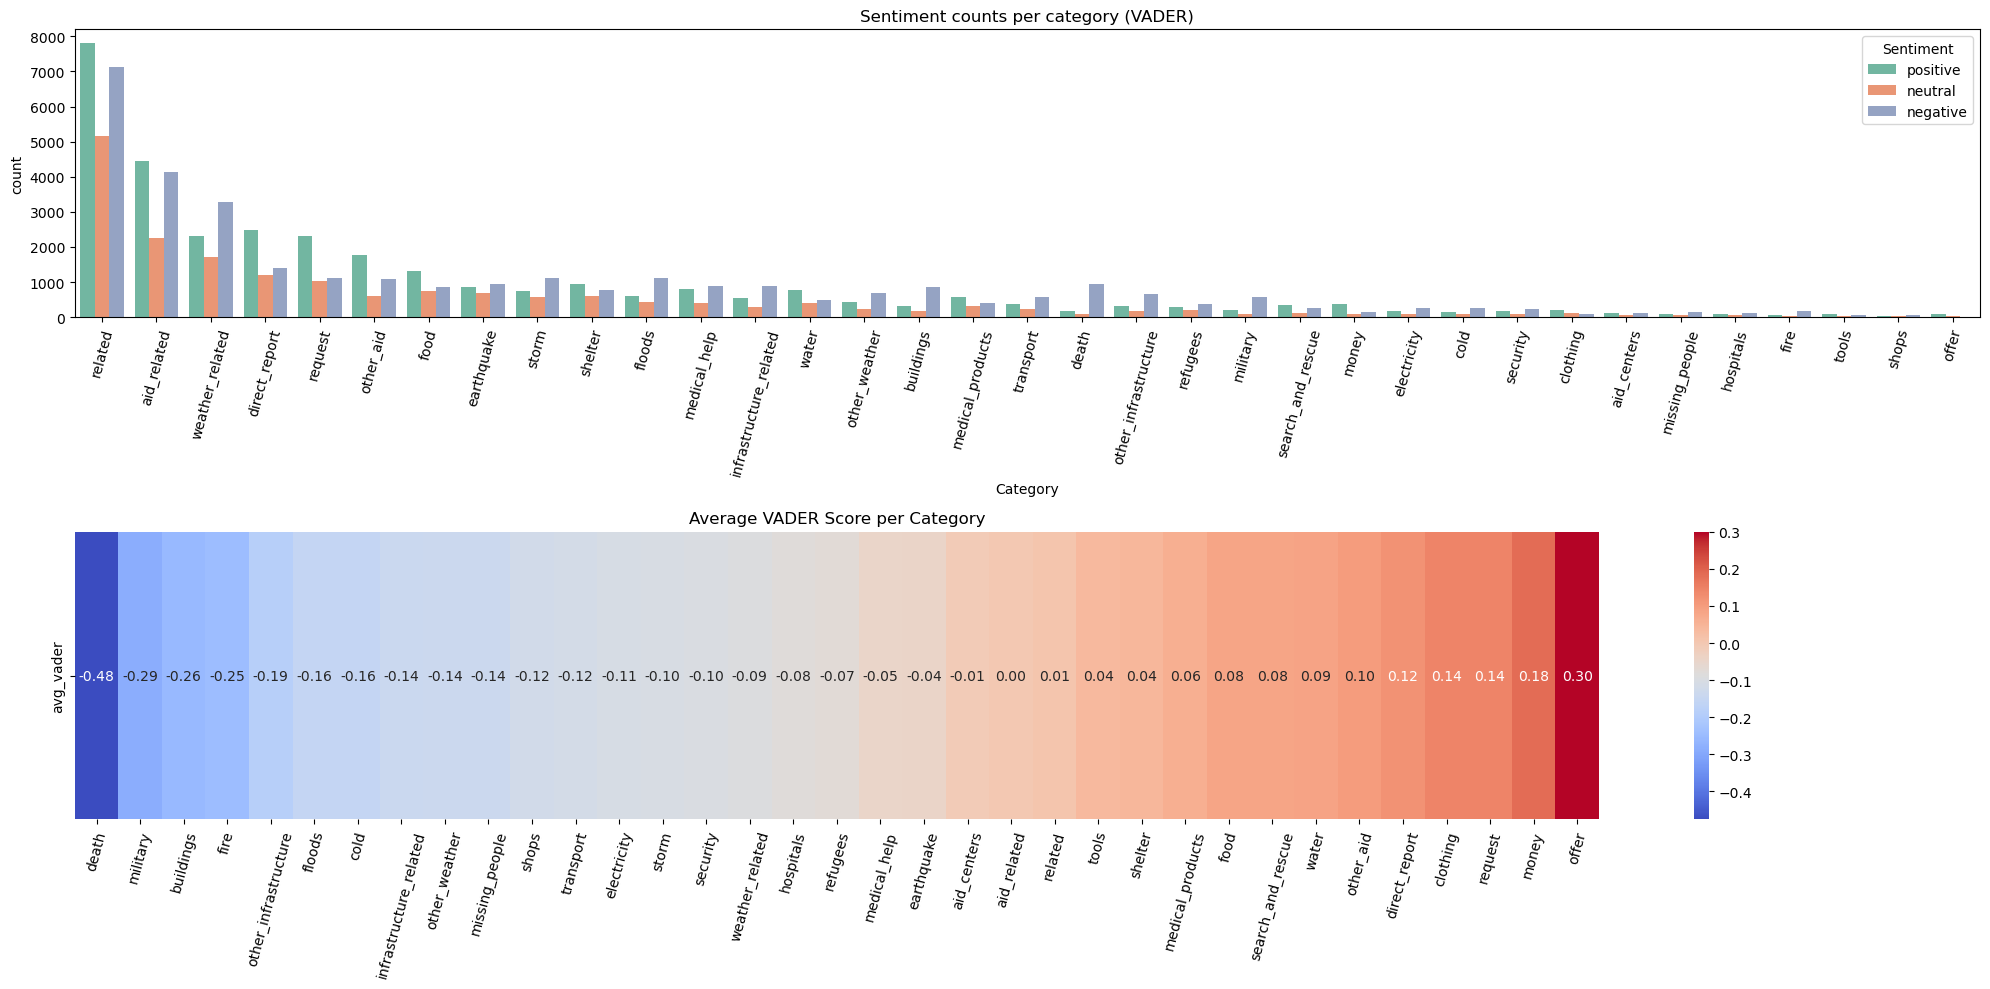

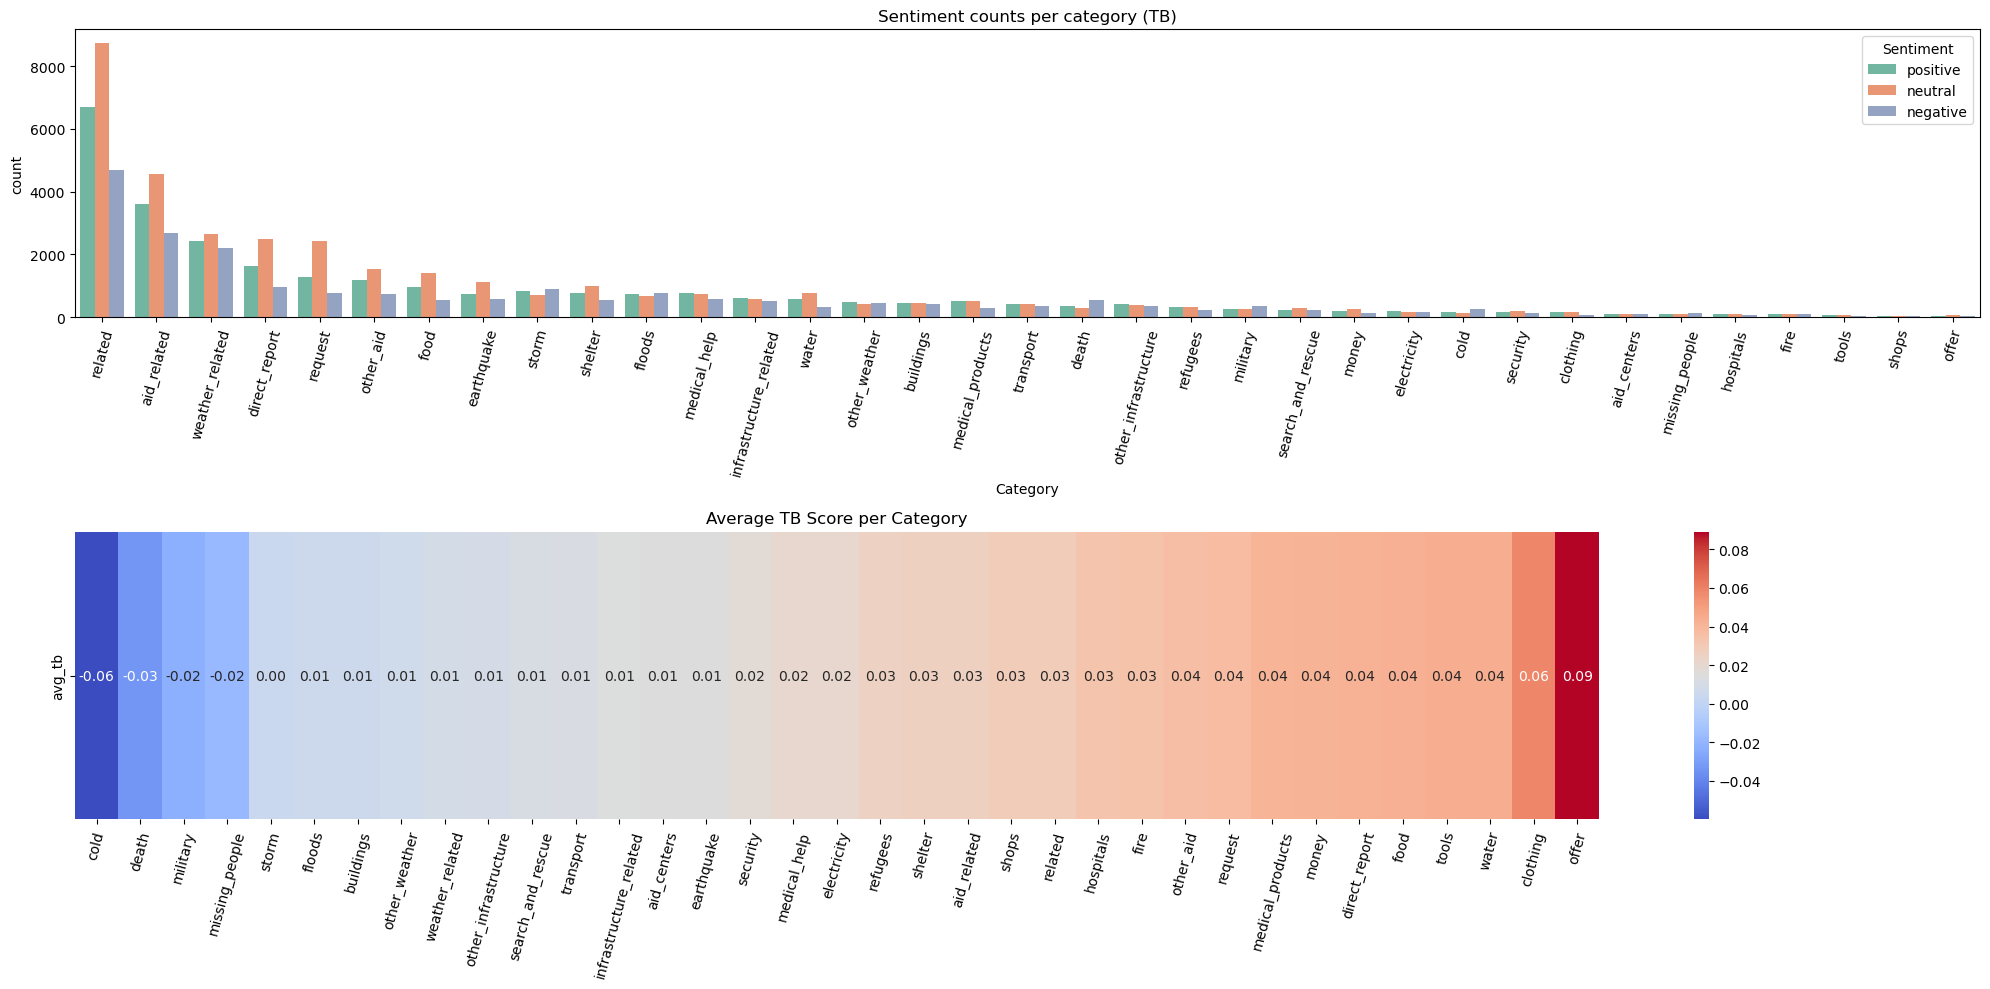

In [5]:
def plot_result(summary_df, type = "vader"):
    melted = summary_df.melt( id_vars="category", value_vars=[f"pos_{type}", f"neu_{type}", f"neg_{type}"], var_name="sentiment", value_name="count")
    melted["sentiment"] = melted["sentiment"].map({ f"pos_{type}": "positive", f"neu_{type}": "neutral",f"neg_{type}": "negative"})
    order = melted.groupby("category")["count"].sum().sort_values(ascending = False).keys()
    _, axes = plt.subplots(2, 1, figsize=(20, 10))
    sns.barplot(data=melted, x="category", y="count", hue="sentiment", dodge=True, palette="Set2", ax=axes[0], order=order)
    axes[0].set_title(f"Sentiment counts per category ({type.upper()})")
    axes[0].tick_params(axis='x', rotation=75)
    axes[0].legend(title="Sentiment")
    axes[0].set_xlabel("Category")
    heat_data = summary_df[[f"avg_{type}", "category"]].sort_values(f"avg_{type}")
    sns.heatmap(data=heat_data[[f"avg_{type}"]].T, annot=True, fmt=".2f",cmap="coolwarm", xticklabels=heat_data["category"],ax=axes[1])
    axes[1].set_title(f"Average {type.upper()} Score per Category")
    axes[1].tick_params(axis='x', rotation=75)

    plt.tight_layout()
    plt.show()

plot_result(summary)
plot_result(summary, type = "tb")

Sentiment analysis shows that disaster communication tends to be neutral to slightly positive overall — driven by coordination, aid, and requests for help — with pockets of strong negativity in damage- or fatality-related categories.
VADER detects sharper emotional polarity, while TextBlob trends toward moderation. Together, they show a consistent thematic divide between damage-focused (negative) and aid-focused (positive) messages.